# Data Storytelling

Run the data cleaning program (takes a while)

In [5]:
%run './data_wrangling_capstone_1.ipynb'

In [6]:
phone_df.tail()

,Issue Occurred,Form,Method,Issue,City,State,Zip
1756450,2020-04-08 16:00:00,Phone,Wireless (cell phone/other mobile device),Unwanted Calls,Mountain View,HI,96771
1756451,2020-04-08 03:36:30,Phone,Wired,Unwanted Calls,Prescott Valley,AZ,86314
1756452,2020-04-08 16:11:00,Phone,Wireless (cell phone/other mobile device),Unwanted Calls,Plantation,FL,33317
1756453,2020-04-09 03:40:33,Phone,Wireless (cell phone/other mobile device),Equipment,Miami Gardens,FL,33054
1756456,2020-04-09 03:53:49,Phone,Wireless (cell phone/other mobile device),Availability (including rural call completion),Farmers Branch,TX,75234


In [16]:
import matplotlib.pyplot as plt
from datetime import datetime, date

## Where do robocalls occur most frequently in the US?

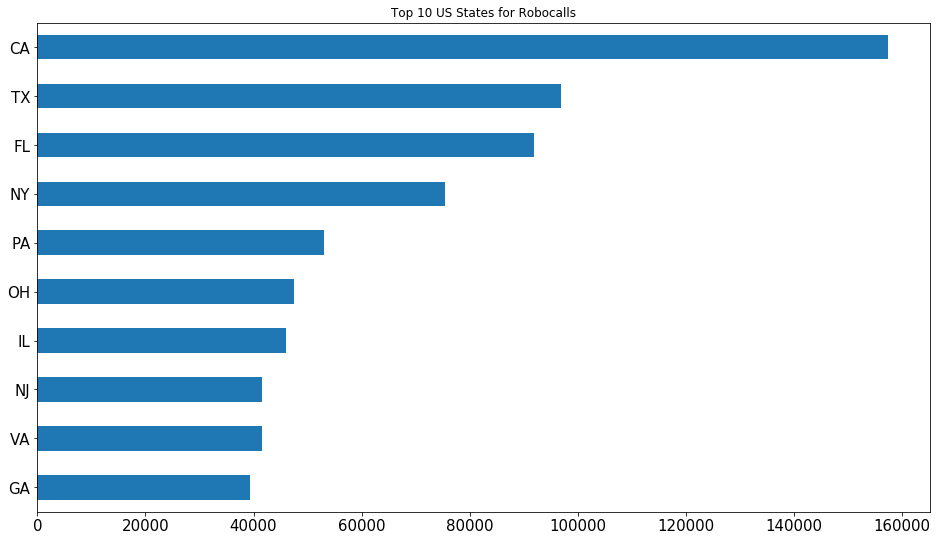

In [8]:
# Where do robocalls occur most frequently in the US?
phone_df['State'].value_counts(ascending=True).tail(10).plot(kind='barh', figsize=(16, 9), title='Top 10 US States for Robocalls', fontsize=15)

From the bar graph, it seems that robocalls tend to target the most urban states, with California being the obvious winner by a mile, with Texas being a distant second.

## For each year? (2015-2019)

In [30]:
def plotyear(year):
    year_count = phone_df[[d.year == year for d in phone_df['Issue Occurred']]].State
    year_count.value_counts(ascending=True).tail(10).plot(kind='barh', figsize=(10, 9), title='Top 10 States in {}'.format(year), fontsize=13)

In [33]:
from ipywidgets import interact, widgets
interact(plotyear, year=widgets.IntSlider(min=2015, max=2019, step=1, value=2019))

interactive(children=(IntSlider(value=2019, description='year', max=2019, min=2015), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

Even with the slider added to change graph by year, California becomes the most targeted region for robocalls. However, we see that Texas overtakes Florida for second place. Regardless, the states with the most metropolitan regions report the most issues.

## What times of the day are robocalls most frequent?

[Text(0, 0, '12AM'),
 Text(0, 0, '1AM'),
 Text(0, 0, '2AM'),
 Text(0, 0, '3AM'),
 Text(0, 0, '4AM'),
 Text(0, 0, '5AM'),
 Text(0, 0, '6AM'),
 Text(0, 0, '7AM'),
 Text(0, 0, '8AM'),
 Text(0, 0, '9AM'),
 Text(0, 0, '10AM'),
 Text(0, 0, '11AM'),
 Text(0, 0, '12PM'),
 Text(0, 0, '1PM'),
 Text(0, 0, '2PM'),
 Text(0, 0, '3PM'),
 Text(0, 0, '4PM'),
 Text(0, 0, '5PM'),
 Text(0, 0, '6PM'),
 Text(0, 0, '7PM'),
 Text(0, 0, '8PM'),
 Text(0, 0, '9PM'),
 Text(0, 0, '10PM'),
 Text(0, 0, '11PM')]

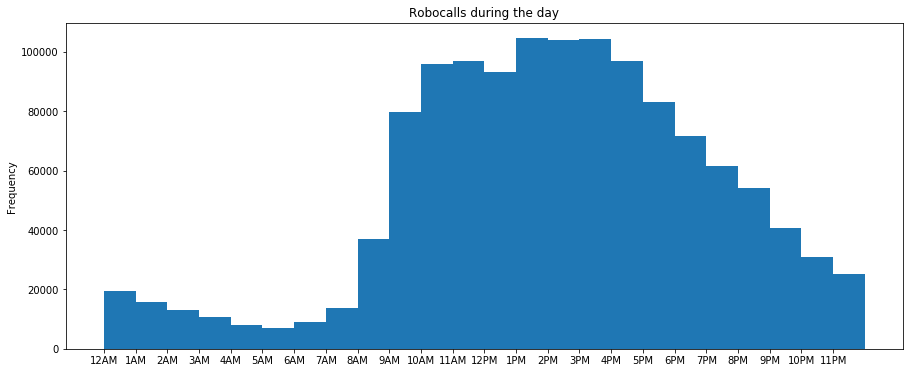

In [9]:
time_s = phone_df['Issue Occurred'].apply(lambda t: t.second + 60*(t.minute + 60*t.hour))
x = [i * 3600 for i in range(24)]
x_label = [(str(i%12) if i%12 != 0 else '12') + ('AM' if i < 12 else 'PM') for i in range(24)]

# plot time frequency
ax = time_s.plot(kind='hist', title='Robocalls during the day', bins=24, range=(0,24*60*60), figsize=(15,6), xticks=x)
ax.set_xticklabels(x_label)

Based on the dataset, robocalls in the US occur most frequently in the afternoon, peaking around 2PM to 4PM.

## Which methods are robocalls encounter most frequently?

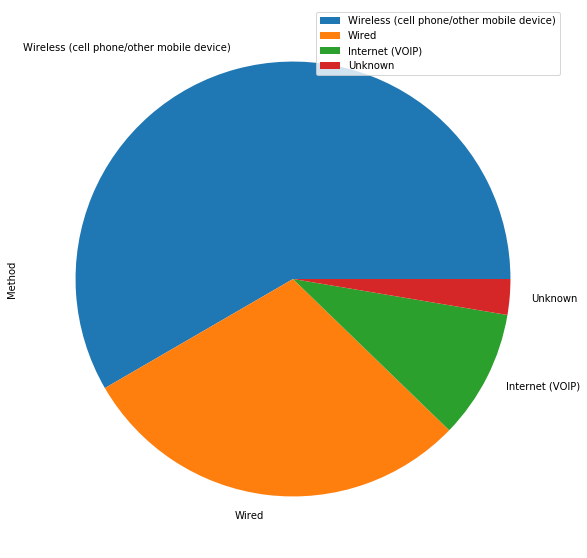

In [10]:
phone_df['Method'].value_counts().plot(kind='pie', figsize=(10,10), legend=True)

In [11]:
issue_count = phone_df.Issue.value_counts()
issue_count

Unwanted Calls                                                      668265
Telemarketing (including do not call and spoofing)                  210627
Billing                                                             114664
Robocalls                                                           102585
Availability (including rural call completion)                       41385
Equipment                                                            40192
Privacy                                                              25566
Number Portability (keeping your number if you change providers)     25281
Junk Faxes                                                           19043
Cramming (unauthorized charges on your phone bill)                   13958
Interference (including signal jammers)                              10420
Open Internet/Net Neutrality                                          2492
Slamming (change of your carrier without permission)                  1623
Rural Call Completion    

## What are the most commonly reported issues?

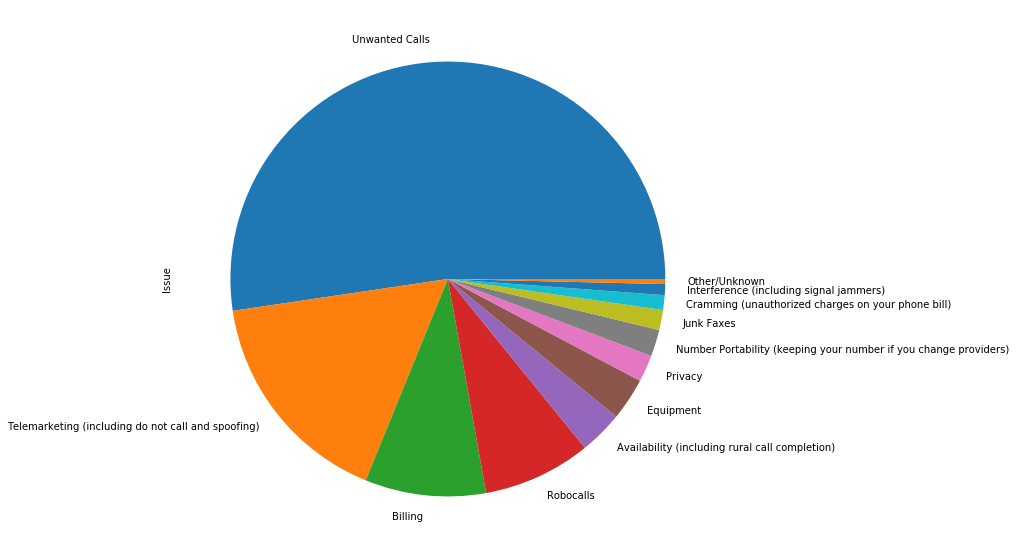

In [12]:
threshold = 10000
issue_count_simp = issue_count[issue_count >= threshold]
issue_count_simp['Other/Unknown'] = issue_count[issue_count < threshold].sum()

issue_count_simp.plot(kind='pie', figsize=(10,10))

Phone users most commonly report unwanted calls, while robocalls being ironically much less reported. However, whether the "unwanted calls" belong to another specific category such as telemarketing, billing, or robocalls is unknown.

## Is the number of unwanted calls increasing overtime?

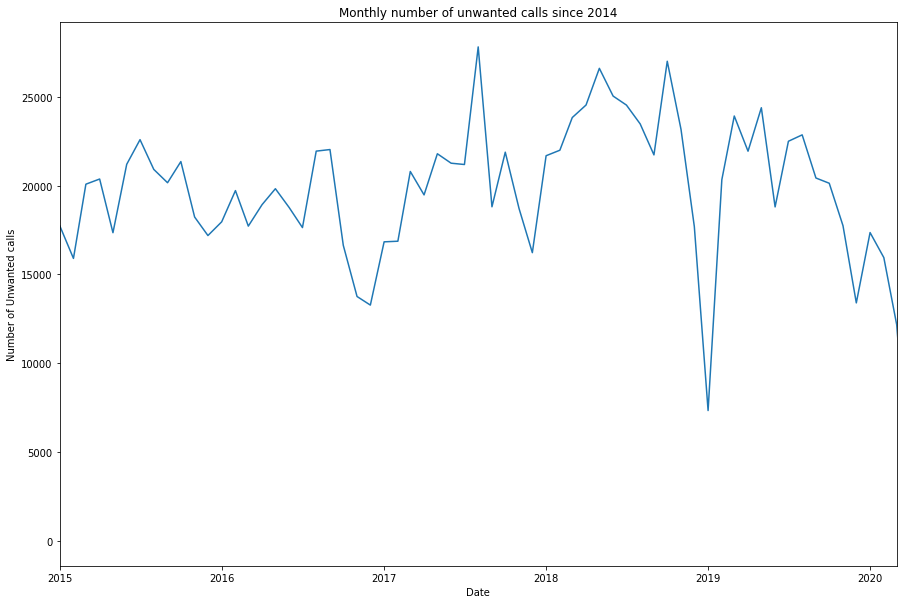

In [23]:
# plot total per month (since 2015 to past month)
month_count = phone_df['Issue Occurred'].apply(lambda d: date(d.year, d.month, 1) if (d.year >= 2014 and d.year <= 2020) else np.nan).dropna().value_counts()
month_count = month_count.sort_index()

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(month_count.index.values, month_count)
ax.set(xlabel='Date', ylabel='Number of Unwanted calls', title='Monthly number of unwanted calls since 2014')
plt.xlim(date(2015, 1, 1), date(2020, 3, 1))
plt.show()

Because of the enormous amount of data from that date range, I decided to plot by month instead of by day. Despite the (much) cleaner graph, there seems to be no clear increase or decrease in numbers of unwanted calls since 2014.